<a href="https://colab.research.google.com/github/AlexMendozaPrado/AlgoritmosAvanzados/blob/main/EsferayRastrigin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

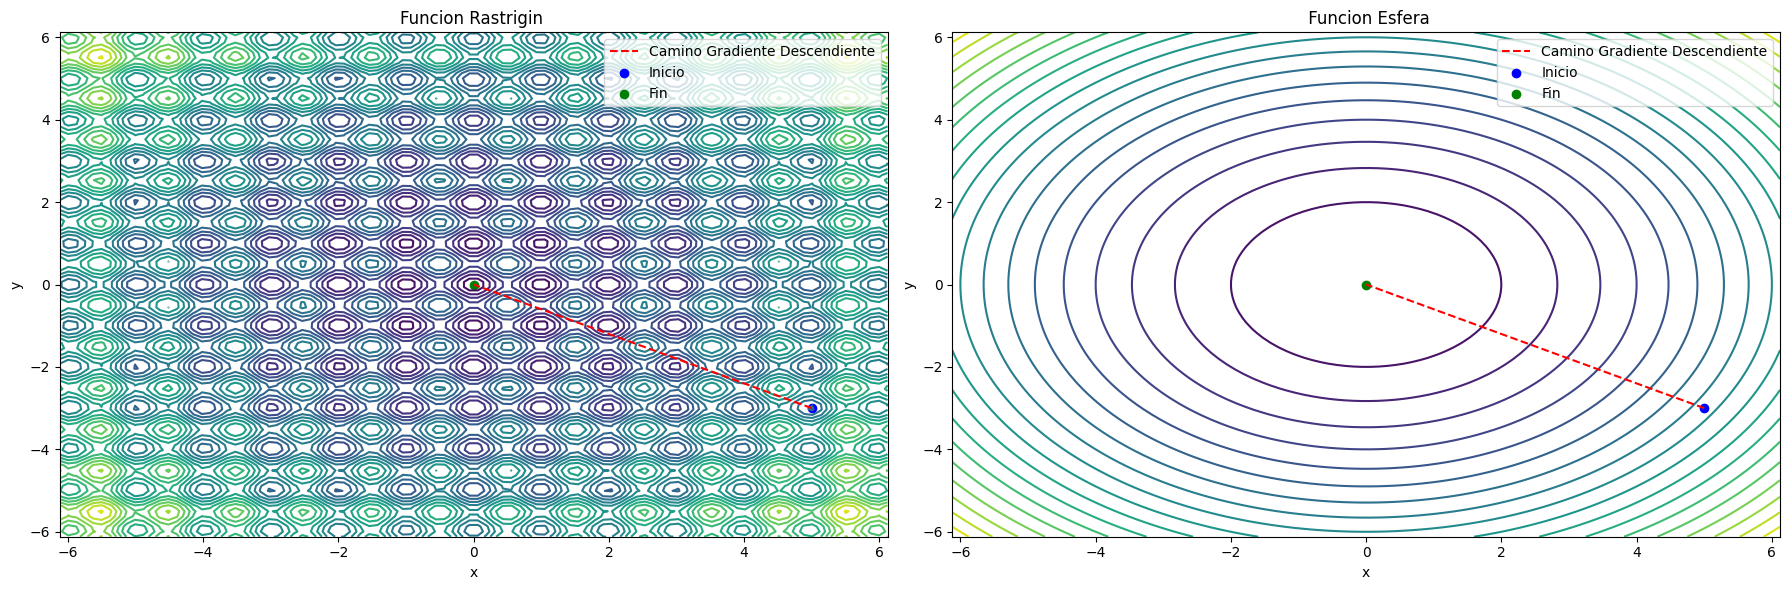

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definiciones de las funciones y sus gradientes
def rastrigin_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def rastrigin_gradient(x):
    A = 10
    return np.array([2 * xi + 2 * np.pi * A * np.sin(2 * np.pi * xi) for xi in x])

def sphere_function(x):
    return sum([xi**2 for xi in x])

def sphere_gradient(x):
    return 2 * x

def rosenbrock(x, n):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(n-1)])

def rosenbrock_grad(x, n):
    grad = np.zeros(n)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    for i in range(1, n-1):
        grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
    grad[-1] = 200 * (x[n-1] - x[n-2]**2)
    return grad


# Algoritmo de descenso de gradiente
def gradient_descent(initial_x, func, grad_func, alpha=0.01, precision=1e-4, max_iters=1000):
    x = initial_x
    path = [x]
    for _ in range(max_iters):
        grad = grad_func(x)
        if np.linalg.norm(grad) <= precision:
            break
        x = x - alpha * grad
        path.append(x)
    return x, np.array(path)

# Parámetros de la simulación
alpha = 0.5  # Un tamaño de paso más pequeño para prevenir errores numéricos
initial_x = np.array([5.0, -3.0])

# Ejecutar el algoritmo de descenso de gradiente para cada función
x_opt_rastrigin, path_rastrigin = gradient_descent(initial_x, rastrigin_function, rastrigin_gradient, alpha)
x_opt_sphere, path_sphere = gradient_descent(initial_x, sphere_function, sphere_gradient, alpha)

# Preparar la malla de puntos para el gráfico de contorno
x_vals = np.linspace(-6.12, 6.12, 100)
y_vals = np.linspace(-6.12, 6.12, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular los valores Z para cada función
Z_rastrigin = np.array([[rastrigin_function(np.array([x, y])) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
Z_sphere = np.array([[sphere_function(np.array([x, y])) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de Rastrigin
cs_rastrigin = axs[0].contour(X, Y, Z_rastrigin, levels=20, cmap='viridis')
axs[0].plot(path_rastrigin[:, 0], path_rastrigin[:, 1], 'r--', label='Camino Gradiente Descendiente')
axs[0].scatter(path_rastrigin[0, 0], path_rastrigin[0, 1], c='b', label='Inicio')
axs[0].scatter(x_opt_rastrigin[0], x_opt_rastrigin[1], c='g', label='Fin')
axs[0].set_title('Funcion Rastrigin ')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Gráfico de la Esfera
cs_sphere = axs[1].contour(X, Y, Z_sphere, levels=20, cmap='viridis')
axs[1].plot(path_sphere[:, 0], path_sphere[:, 1], 'r--', label='Camino Gradiente Descendiente')
axs[1].scatter(path_sphere[0, 0], path_sphere[0, 1], c='b', label='Inicio')
axs[1].scatter(x_opt_sphere[0], x_opt_sphere[1], c='g', label='Fin')
axs[1].set_title(' Funcion Esfera')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()



plt.tight_layout()
plt.show()
